In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
import os

directory = '../tmp_tables/'
filenames = os.listdir(directory)
paths = ['{}{}'.format(directory, filename) for filename in filenames]
df = pd.read_csv(paths[1], sep=';')
df

,Размер массива,Выбором Случайные [0..5],Выбором Случайные [0..4000],Выбором Почти отсортированный [0..4000],Выбором Обратно отсортированный [4100 -> 1],Пузырьковая Случайные [0..5],Пузырьковая Случайные [0..4000],Пузырьковая Почти отсортированный [0..4000],Пузырьковая Обратно отсортированный [4100 -> 1],Пузырьковая_Айверсон1 Случайные [0..5],...,Быстрая_Хоар Почти отсортированный [0..4000],Быстрая_Хоар Обратно отсортированный [4100 -> 1],Быстрая_Ломуто Случайные [0..5],Быстрая_Ломуто Случайные [0..4000],Быстрая_Ломуто Почти отсортированный [0..4000],Быстрая_Ломуто Обратно отсортированный [4100 -> 1],Пирамидальная Случайные [0..5],Пирамидальная Случайные [0..4000],Пирамидальная Почти отсортированный [0..4000],Пирамидальная Обратно отсортированный [4100 -> 1]
0,50,3092,2831,2514,2718,2931,3163,1517,1456,3456,...,1434,952,1403,1522,1949,2115,1703,1767,1784,1477
1,60,3922,3958,3605,3604,3733,4039,1893,1950,4389,...,1597,992,1515,1783,2521,2524,1921,2089,2009,1678
2,70,5176,5212,4902,4672,4535,5043,2332,2483,5510,...,1833,1013,1739,2034,3240,3188,2205,2422,2326,1952
3,80,6594,6746,6369,5948,5566,6270,2861,3136,6925,...,2050,1191,1994,2331,3872,3927,2532,2788,2715,2273
4,90,8281,8374,8111,7356,6726,7635,3405,3933,8587,...,2277,1184,2302,2649,4694,4770,2860,3175,3047,2645
5,100,10129,10282,10108,9070,7970,9280,4101,4925,10325,...,2509,1299,2565,2940,5593,5636,3201,3576,3472,2892
6,110,12043,12243,12096,10809,9266,10749,4762,5878,12073,...,2758,1223,2909,3262,6550,6652,3529,3976,3842,3191
7,120,14201,14493,14375,12762,10627,12474,5511,7161,14203,...,3002,1381,3274,3575,7586,7735,3901,4382,4189,3532
8,130,16674,17329,17002,15018,12060,14424,6278,8605,16168,...,3266,1386,3714,4017,8641,8970,4184,4809,4541,3907
9,140,19113,19637,19591,17539,13678,16478,7291,10202,18355,...,3439,1486,4113,4254,9789,10119,4553,5220,4953,4215


Группировка по типам массивов

In [53]:
new_data = list()
titles = list()

for i in range(1, 5):
    data = df[df.columns[i::4]]
    titles.append(data.columns[0][str(data.columns[0]).index(' '):])
    data.insert(0, 'Размер массива', df.loc[:, 'Размер массива'])
    renamer = {k: k.split()[0] for k in data.columns[1:]}
    data = data.rename(columns=renamer)
    new_data.append(data)
new_data[3]

,Размер массива,Выбором,Пузырьковая,Пузырьковая_Айверсон1,Пузырьковая_Айверсон2,Вставками,Бинарными_вставками,Подсчетом_устойчивая,Цифровая,Слиянием,Быстрая_Хоар,Быстрая_Ломуто,Пирамидальная
0,50,2718,1456,1490,1495,1184,1731,601,883,1808,952,2115,1477
1,60,3604,1950,1970,2006,1441,2266,628,947,1963,992,2524,1678
2,70,4672,2483,2512,2512,1713,2847,650,991,2233,1013,3188,1952
3,80,5948,3136,3228,3183,2077,3582,668,1033,2379,1191,3927,2273
4,90,7356,3933,4028,3917,2462,4440,674,1103,2704,1184,4770,2645
5,100,9070,4925,5006,4857,2963,5349,692,1158,2925,1299,5636,2892
6,110,10809,5878,6081,5854,3319,6410,726,1206,3202,1223,6652,3191
7,120,12762,7161,7410,7057,3913,7614,757,1293,3420,1381,7735,3532
8,130,15018,8605,9006,8459,4474,9016,880,1357,3756,1386,8970,3907
9,140,17539,10202,10482,9769,5322,10423,808,1421,3904,1486,10119,4215


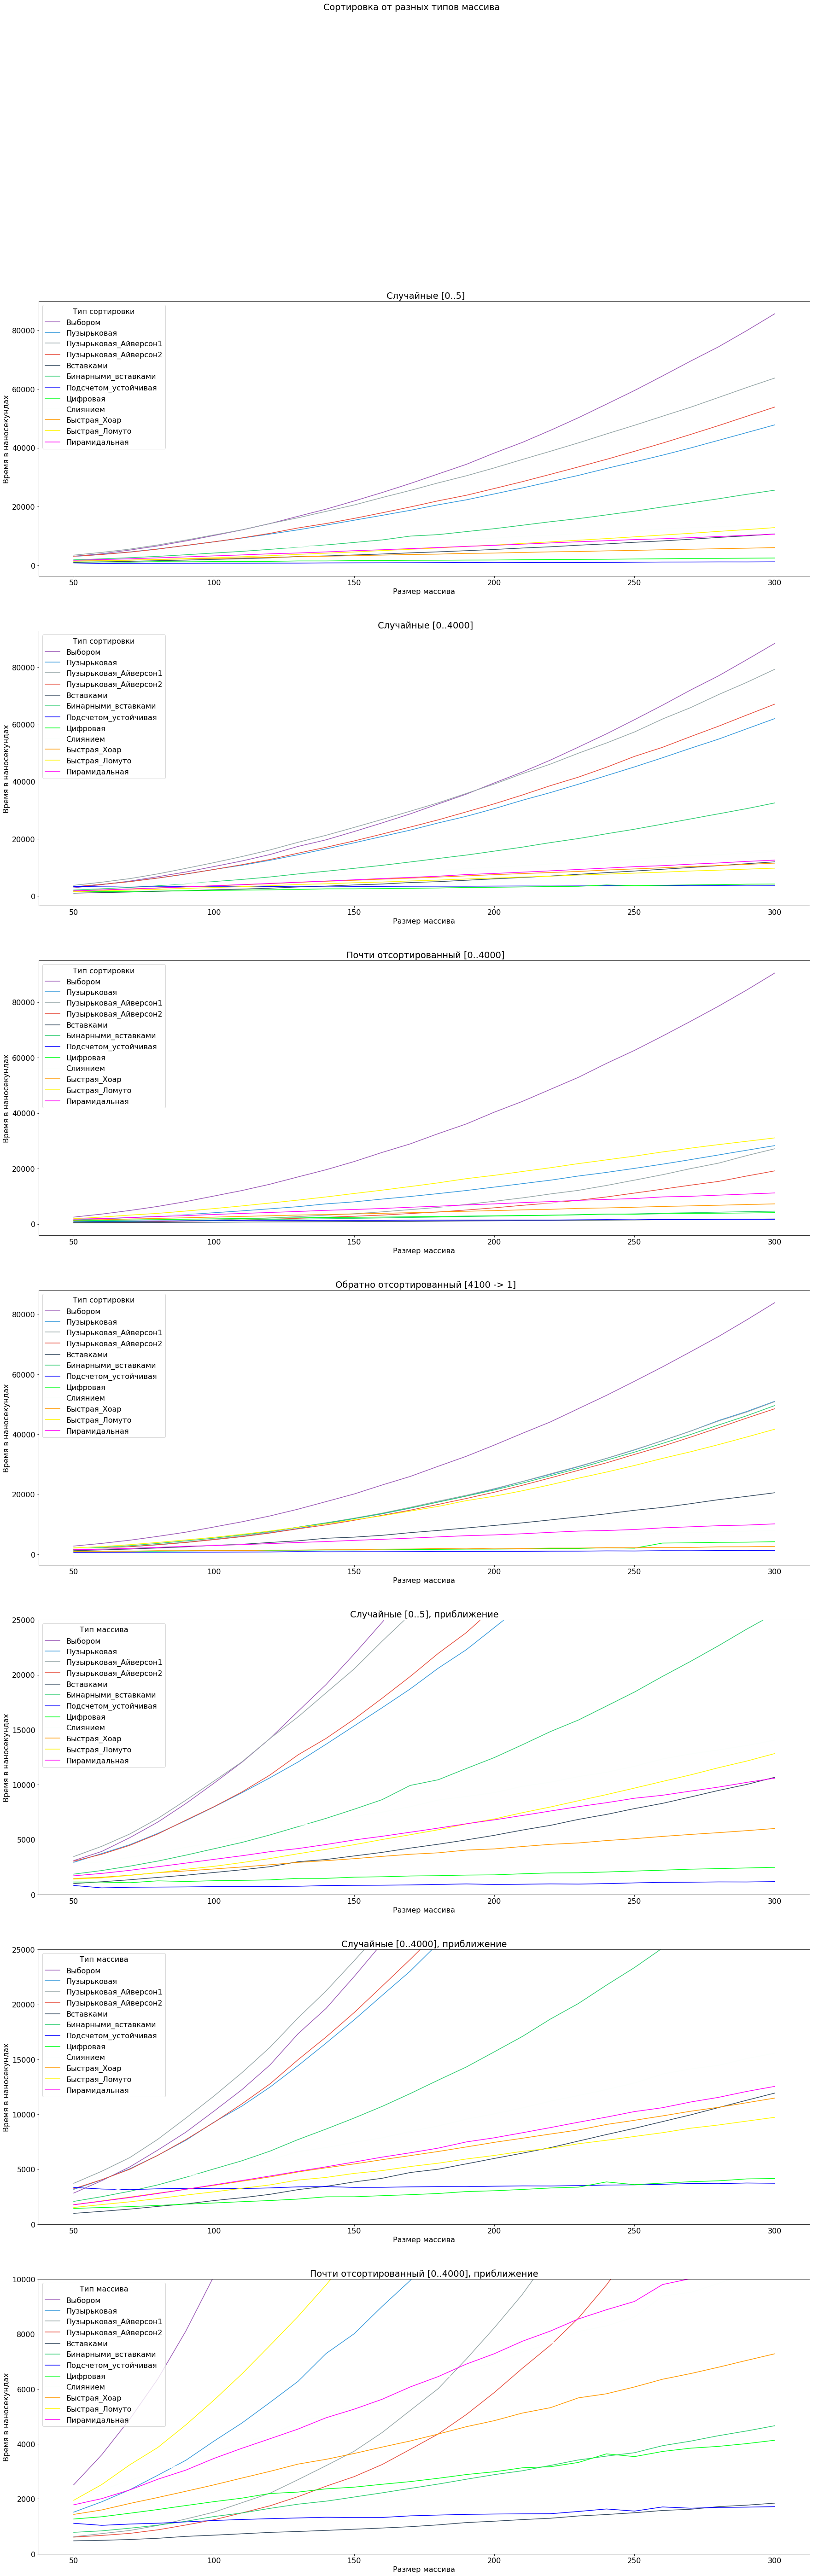

In [54]:
fig, axes = plt.subplots(len(new_data) + 3, 1, figsize=(30, 90))
plt.rcParams.update({'font.size': 16})
for ax in axes:
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
fig.suptitle('Сортировка от разных типов массива')

pal = [
    "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71",
    "#0400ff", "#00ff1a", "#fcfffd", "#f90", "#fff700", "#ff00f7"
]

for ind, data in enumerate(new_data):
    sns.lineplot(palette=pal,
                 ax=axes[ind],
                 data=pd.melt(data, 'Размер массива', var_name='Тип сортировки', value_name='Время в наносекундах'),
                 x='Размер массива', y='Время в наносекундах', hue='Тип сортировки')
    axes[ind].set_title(titles[ind])

sns.lineplot(palette=pal,
             ax=axes[len(new_data)],
             data=pd.melt(new_data[0], 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
             x='Размер массива', y='Время в наносекундах', hue='Тип массива')
axes[len(new_data)].set_title('Случайные [0..5], приближение')
axes[len(new_data)].set_ylim(bottom=0, top=2.5 * 10 ** 4)

sns.lineplot(palette=pal,
             ax=axes[len(new_data) + 1],
             data=pd.melt(new_data[1], 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
             x='Размер массива', y='Время в наносекундах', hue='Тип массива')
axes[len(new_data) + 1].set_title('Случайные [0..4000], приближение')
axes[len(new_data) + 1].set_ylim(bottom=0, top=2.5 * 10 ** 4)

sns.lineplot(palette=pal,
             ax=axes[len(new_data) + 2],
             data=pd.melt(new_data[2], 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
             x='Размер массива', y='Время в наносекундах', hue='Тип массива')
axes[len(new_data) + 2].set_title('Почти отсортированный [0..4000], приближение')
axes[len(new_data) + 2].set_ylim(bottom=0, top=10 ** 4)

plt.show()

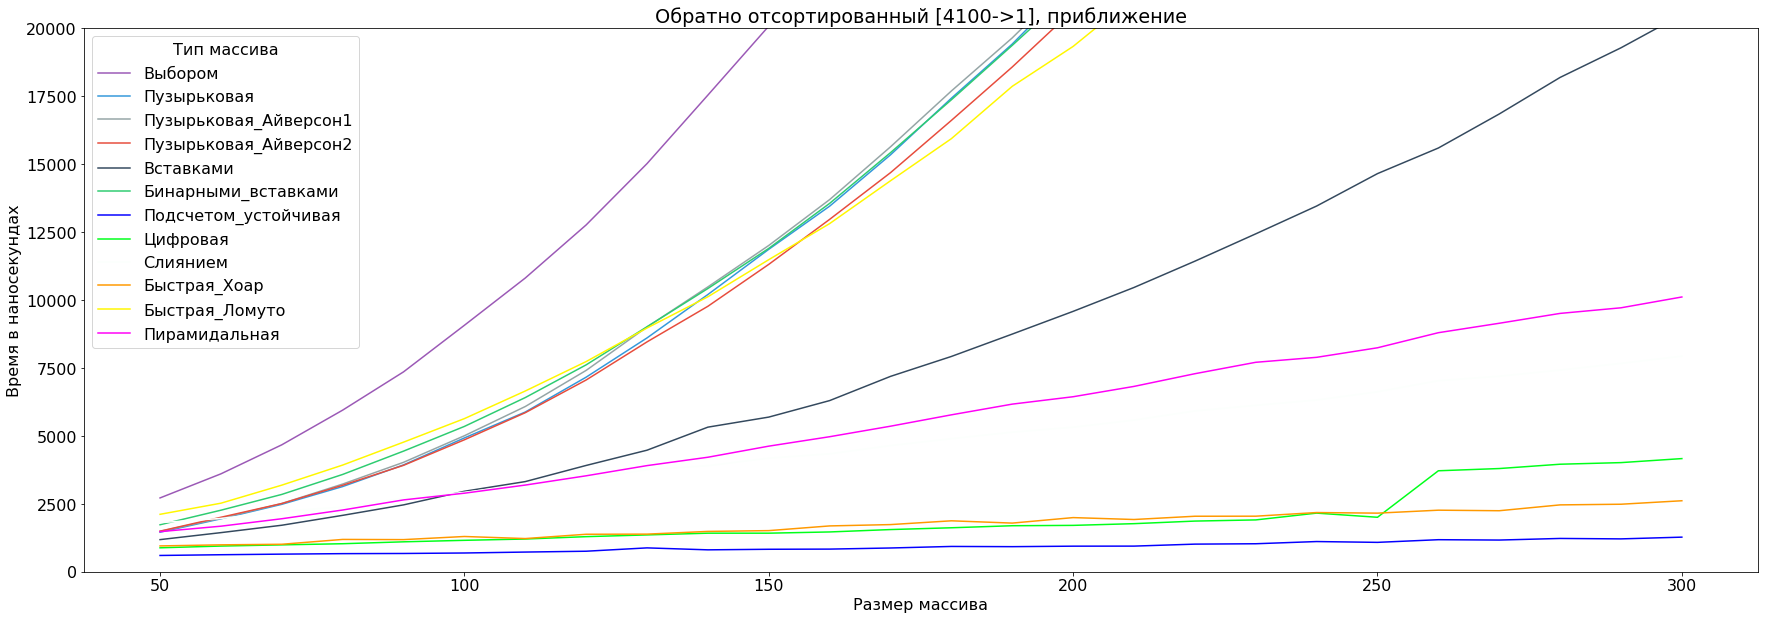

In [55]:
fig = plt.figure(figsize=(30, 10))
g = sns.lineplot(palette=pal,
                 data=pd.melt(new_data[3], 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
                 x='Размер массива', y='Время в наносекундах', hue='Тип массива')
g.set(ylim=(0, 2 * 10 ** 4))
g.set_title('Обратно отсортированный [4100->1], приближение')
plt.show()

Группировка по видам сортировок

In [56]:
new_data = list()
titles = list()

for i in range(1, 50, 4):
    data = df[df.columns[i:i + 4]]
    titles.append(data.columns[0][0:str(data.columns[0]).index(' ') + 1])
    data.insert(0, 'Размер массива', df.loc[:, 'Размер массива'])
    renamer = {k: k[k.index(' ') + 1:] for k in data.columns[1:]}
    data = data.rename(columns=renamer)
    new_data.append(data)

IndexError: index 0 is out of bounds for axis 0 with size 0

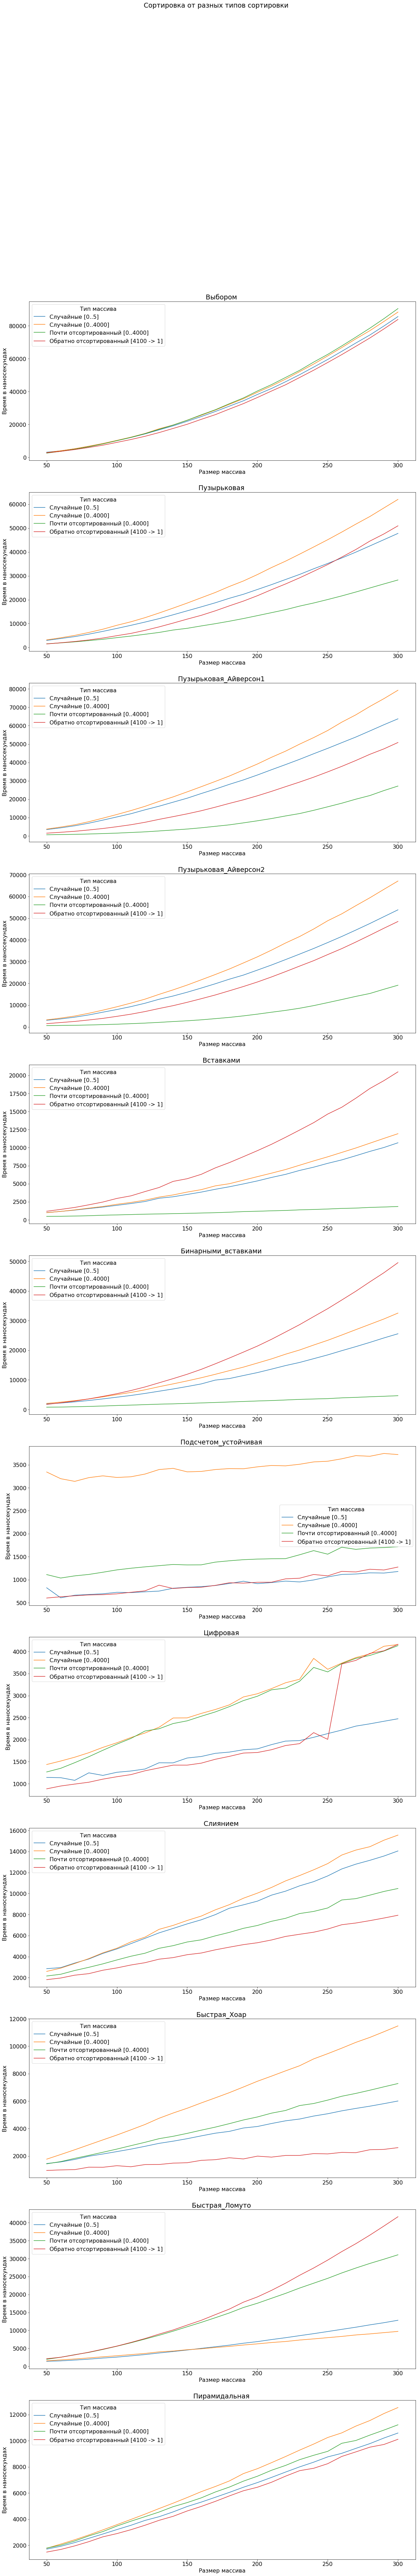

In [57]:
fig, axes = plt.subplots(len(new_data), 1, figsize=(20, 120))
plt.rcParams.update({'font.size': 16})
for ax in axes:
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
fig.suptitle('Сортировка от разных типов сортировки')

pal = [
    "#9b59b6", "#3498db", "#95a5a6", "#e74c3c"
]

for ind, data in enumerate(new_data):
    sns.lineplot(
        ax=axes[ind],
        data=pd.melt(data, 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
        x='Размер массива', y='Время в наносекундах', hue='Тип массива')
    axes[ind].set_title(titles[ind])

#
# sns.lineplot(
#     ax=axes[len(new_data)],
#     data=pd.melt(new_data[-1], 'Размер массива', var_name='Тип массива', value_name='Время в наносекундах'),
#     x='Размер массива', y='Время в наносекундах', hue='Тип массива')
# axes[len(new_data)].set_title('Пирамидальная, приближение')
# axes[len(new_data)].set_ylim(bottom=0, top=3 * 10**5)
plt.show()